In [1]:
%cd ..
%matplotlib inline

d:\Models\person_attribute_recognition


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from torch.optim import lr_scheduler

In [3]:
net = nn.Linear(10, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

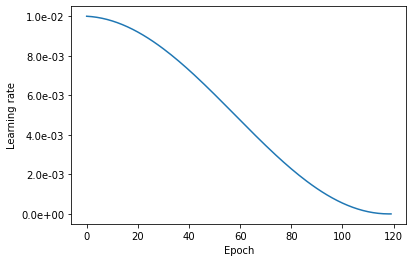

In [4]:
x = []
y = []
cus_lr_scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=120, eta_min=0.000001)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
        
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1e'))
ax.set_ylabel('Learning rate')
ax.set_xlabel('Epoch')
plt.savefig('CosineAnnealingLR.pdf', dpi=1200)
plt.show()
# plt.close(fig)

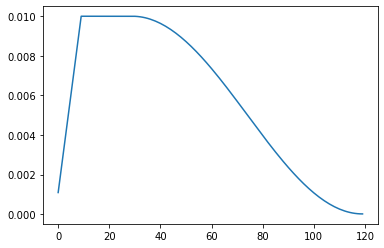

In [5]:
x = []
y = []
from schedulers.warmup import WarmupCosineAnnealingLR
cus_lr_scheduler = WarmupCosineAnnealingLR(optimizer, max_iters=120, delay_iters=30, eta_min_lr=0.00001, warmup_factor=0.01, warmup_iters=10, warmup_method="linear")
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
plt.plot(x, y)
plt.show()


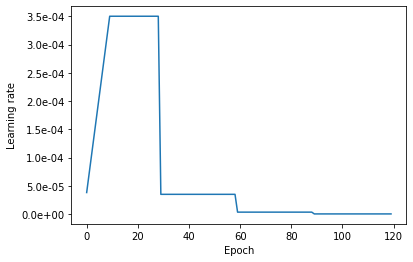

In [6]:
x = []
y = []

from schedulers.warmup import WarmupMultiStepLR
optimizer = torch.optim.SGD(net.parameters(), lr=0.00035)
cus_lr_scheduler = WarmupMultiStepLR(optimizer, milestones=[30, 60, 90], gamma=0.1, warmup_factor=0.01, warmup_iters=10)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(optimizer.param_groups[-1]['lr'])
        optimizer.step()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1e'))
ax.set_ylabel('Learning rate')
ax.set_xlabel('Epoch')
plt.savefig('lr_scheduler.pdf', dpi=1200)
plt.show()
# plt.close(fig)

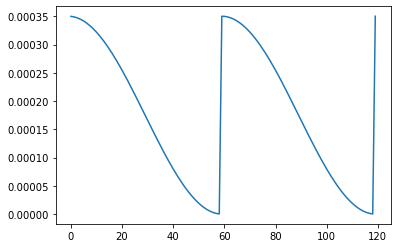

In [7]:
x = []
y = []
cus_lr_scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer,  T_0=60, T_mult=1, eta_min=0)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
plt.plot(x, y)
plt.show()